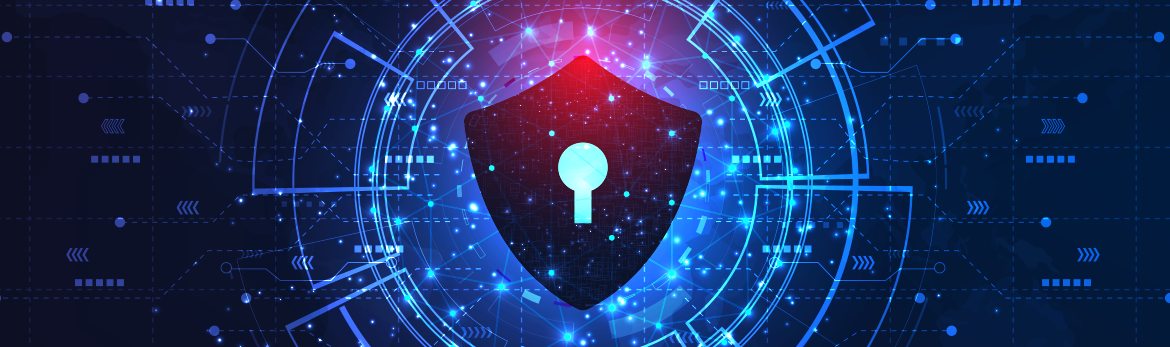

# Politics & the US-Russian Cybercrime Dynamics
_Authors: Elizabeth Baranova (202), Daria Ivanova (201), Viktoria Rybkova (202), Angelina Kublitskaya (201)_

_Data Analysis in Python, May 2022_

### Project outline

* Preparing the dataset
* Exploratory analysis, modeling, validation 
* Causal inference using Diff-Diff
* Visualisation
* Interpretation

In [9]:
# Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import os

In [10]:
# Import and clean data
os.chdir('/Users/lisabm/Downloads/')
os.getcwd()
cyber_att = pd.read_csv('cyber-operations-incidents.csv')
cyber_att = cyber_att[['Date', 'Victims', 'Sponsor']]
cyber_att = cyber_att.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
cyber_att = cyber_att.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
cyber_att = cyber_att[cyber_att['Victims'].str.contains('Russia|United States|U.S.|Switzerland')]

2014 Russian Spring

In [28]:
cyber_att.Date = pd.to_datetime(cyber_att.Date, dayfirst = True)
cyber_att = cyber_att.sort_values('Date').reset_index(drop=True)
cyber_att['Date'] = pd.to_datetime(cyber_att['Date'])
res = cyber_att[~(cyber_att['Date'] < '2013-03-04')]
treatment_group = res[res['Victims'].str.contains('Russia|United States|U.S.')]
control_group = res[res['Victims'].str.contains('Switzerland')]

mask_1 = (control_group['Date'] > '2014-03-04') & (control_group['Date'] <= '2015-03-04')

rus_spring_before = treatment_group[~(treatment_group['Date'] > '2014-03-04')]
mask = (treatment_group['Date'] > '2014-03-04') & (treatment_group['Date'] <= '2015-03-04')
rus_spring_after = treatment_group.loc[mask]   
rsbt = len(rus_spring_before) #7
rsat = len(rus_spring_after) #21 -> three times more

control_spring_before = control_group[~(control_group['Date'] > '2014-03-04')]
control_spring_after = control_group.loc[mask_1] 
rsbc = len(control_spring_before) #1
rsac = len(control_spring_after) #1 -> no difference
rsbt
rsat
rsbc 
rsac

1

2015 Syria Intervention

In [29]:
mask_3 = (treatment_group['Date'] > '2015-02-06') & (treatment_group['Date'] <= '2016-01-23')
mask_2 = (treatment_group['Date'] > '2014-09-10') & (treatment_group['Date'] <= '2015-02-06')
syria_before = treatment_group.loc[mask_2]
syria_after = treatment_group.loc[mask_3]    
sbt = len(syria_before) #9
sat = len(syria_after) #10
mask2 = (control_group['Date'] > '2014-09-10') & (control_group['Date'] <= '2015-02-06')
mask3 = (control_group['Date'] > '2015-02-06') & (control_group['Date'] <= '2016-01-23')
control_syria_before = control_group.loc[mask2]
control_syria_after = control_group.loc[mask3] 
sbc = len(control_syria_before) #1
sac = len(control_syria_after) #0
sbt
sat
sbc
sac

0

2016 Trump elections

In [30]:
mask_4 = (treatment_group['Date'] > '2016-11-09') & (treatment_group['Date'] <= '2017-04-03')
mask_5 = (treatment_group['Date'] > '2015-12-23') & (treatment_group['Date'] <= '2016-11-09')
trump_before = treatment_group.loc[mask_4]
trump_after = treatment_group.loc[mask_5]    
tbt = len(trump_before)#1
tat = len(trump_after) #7
mask5 = (control_group['Date'] > '2015-12-23') & (control_group['Date'] <= '2016-11-09')
mask4 = (control_group['Date'] > '2016-11-09') & (control_group['Date'] <= '2017-04-03')
control_trump_before = control_group.loc[mask5]
control_trump_after = control_group.loc[mask4] 
tbc = len(control_trump_before) #1
tac = len(control_trump_after) #0
tbt
tat
tbc
tac

0

2018 Midterm elections US

In [31]:
mask_8 = (treatment_group['Date'] > '2018-11-02') & (treatment_group['Date'] <= '2019-05-06')
mask_9 = (treatment_group['Date'] > '2017-12-07') & (treatment_group['Date'] <= '2018-11-02')
midterm_before = treatment_group.loc[mask_8]
midterm_after = treatment_group.loc[mask_9]    
mbt = len(midterm_before) #4
mat = len(midterm_after) #21
mask9 = (control_group['Date'] > '2017-12-07') & (control_group['Date'] <= '2018-11-02')
mask8 = (control_group['Date'] > '2018-11-02') & (control_group['Date'] <= '2019-05-06')
control_midterm_before = control_group.loc[mask9]
control_midterm_after = control_group.loc[mask8] 
mbc = len(control_midterm_before) #3
mac = len(control_midterm_after) #0
mbt
mat
mbc
mac

0

2020 Biden elections

In [32]:
mask_6 = (treatment_group['Date'] > '2020-11-13') & (treatment_group['Date'] <= '2021-09-28')
mask_7 = (treatment_group['Date'] > '2019-12-12') & (treatment_group['Date'] <= '2020-11-13')
biden_before = treatment_group.loc[mask_6]
biden_after = treatment_group.loc[mask_7]    
bbt = len(biden_before) #17
bat = len(biden_after) #30
mask7 = (control_group['Date'] > '2019-12-12') & (control_group['Date'] <= '2020-11-13')
mask6 = (control_group['Date'] > '2020-11-13') & (control_group['Date'] <= '2021-09-28')
control_biden_before = control_group.loc[mask7]
control_biden_after = control_group.loc[mask6] 
bbc = len(control_biden_before) #0
bac = len(control_biden_after) #0
bbt
bat
bbc
bac

0

2021 Military buildup on Ukraine border (expansion of NATO assurance rejection)

In [33]:
mask_10 = (treatment_group['Date'] > '2021-03-01') & (treatment_group['Date'] <= '2021-09-28')
mask_11 = (treatment_group['Date'] > '2019-09-26') & (treatment_group['Date'] <= '2021-03-01')
buildup_before = treatment_group.loc[mask_8]
buildup_after = treatment_group.loc[mask_9]    
bubt = len(buildup_before) #4
buat = len(buildup_after) #21
mask9 = (control_group['Date'] > '2019-09-26') & (control_group['Date'] <= '2021-03-01')
mask8 = (control_group['Date'] > '2021-03-01') & (control_group['Date'] <= '2021-09-28')
control_buildup_before = control_group.loc[mask9]
control_buildup_after = control_group.loc[mask8] 
bubc = len(control_buildup_before) #0
buac = len(control_buildup_after) #0
bubt
buat
bubc
buac

0

Difference-in-differences

In [19]:
# Counting mean for treatment group
pre_treatment = (rsbt + sbt + tbt + bbt + mbt + bubt) / 6
post_treatment = (rsat + sat + tat + bat + mat + buat) / 6

# Counting mean for control group 
pre_control = (rsbc + sbc + tbc + bbc + mbc + bubc) / 6
post_control = (rsac + sac + tac + bac + mac + buac) / 6

# Diff-in-diff
diff = (post_treatment - pre_treatment) - (post_control - pre_control)
diff

12.166666666666666

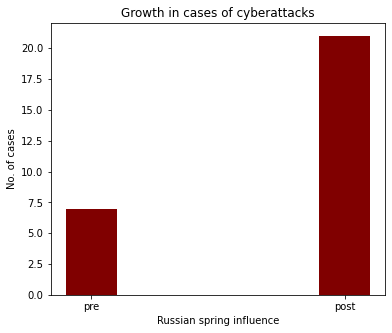

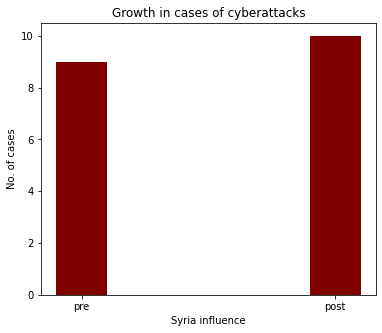

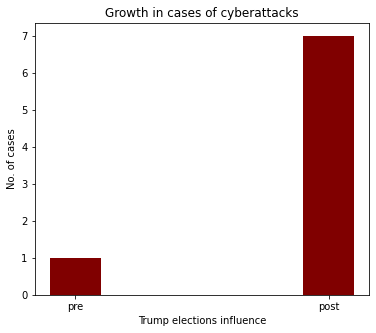

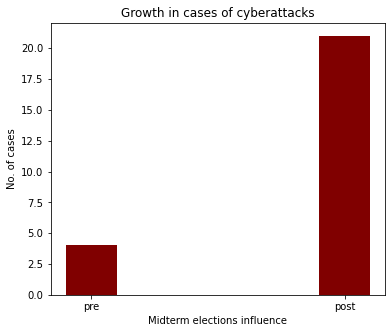

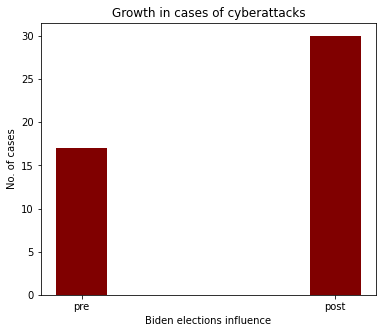

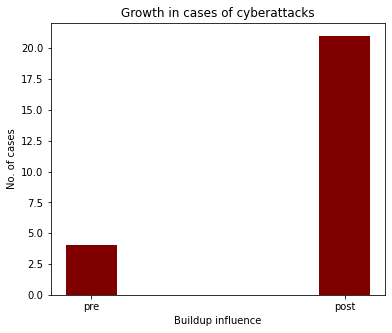

In [20]:
data = {'pre':7, 'post':21}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Russian spring influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()

data = {'pre':9, 'post':10}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Syria influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()

data = {'pre':1, 'post':7}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Trump elections influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()

data = {'pre':4, 'post':21}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Midterm elections influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()

data = {'pre':17, 'post':30}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Biden elections influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()

data = {'pre':4, 'post':21}
time = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(time, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Buildup influence")
plt.ylabel("No. of cases")
plt.title("Growth in cases of cyberattacks")
plt.show()